In [53]:
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
np.random.seed(123)
n_samples=1000
n_sample_ratio=0.9
n_sample_0=int(n_samples*n_sample_ratio)
n_sample_1=n_samples-n_sample_0


In [19]:
n_sample_0,n_sample_1

(900, 100)

In [20]:
class_0=pd.DataFrame({
 'feature_1': np.random.normal(loc=0,scale=1,size=n_sample_0),
 'feature_2': np.random.normal(loc=0,scale=1,size=n_sample_0),
  'target': [0]*n_sample_0

})

class_1=pd.DataFrame({
 'feature_1': np.random.normal(loc=2,scale=1,size=n_sample_1),
 'feature_2': np.random.normal(loc=2,scale=1,size=n_sample_1),
  'target': [1]*n_sample_1

})

In [32]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

### Upsampling

In [38]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [39]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [40]:
df_majority

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [41]:
df_minority

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


### Upsampling Perform

In [43]:
from sklearn.utils import resample

In [44]:
df_minority_upsample=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [47]:
df_minority_upsample.shape

(900, 3)

In [48]:
df_minority_upsample['target'].value_counts()

1    900
Name: target, dtype: int64

In [49]:
df_upsampled=pd.concat([df_minority_upsample,df_majority])

In [50]:
df_upsampled['target'].value_counts()

1    900
0    900
Name: target, dtype: int64

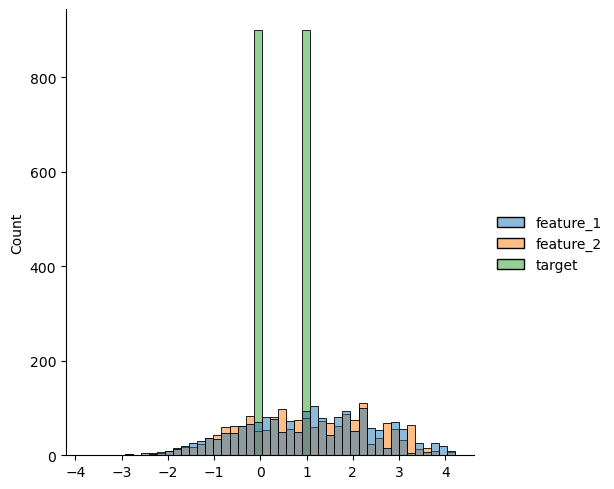

In [54]:
sns.displot(df_upsampled)

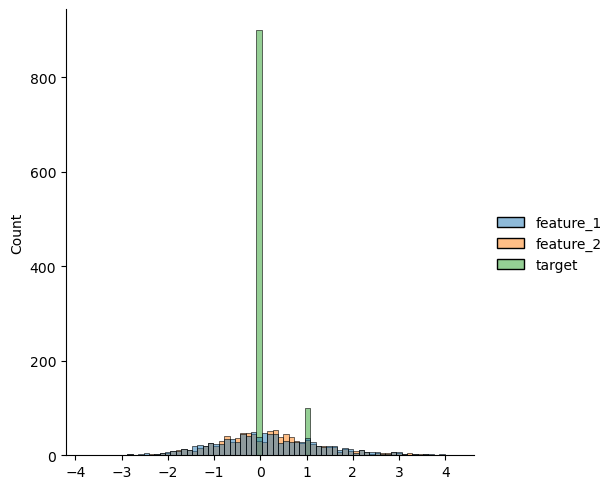

In [55]:
sns.displot(df)

### Down sampling

In [56]:
class_0=pd.DataFrame({
 'feature_1': np.random.normal(loc=0,scale=1,size=n_sample_0),
 'feature_2': np.random.normal(loc=0,scale=1,size=n_sample_0),
  'target': [0]*n_sample_0

})

class_1=pd.DataFrame({
 'feature_1': np.random.normal(loc=2,scale=1,size=n_sample_1),
 'feature_2': np.random.normal(loc=2,scale=1,size=n_sample_1),
  'target': [1]*n_sample_1

})

In [57]:
dp=pd.concat([class_0,class_1]).reset_index(drop=True)

In [59]:
df_minority=dp[dp['target']==1]
df_majority=dp[dp['target']==0]

In [64]:
df_majority_downsample=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=40)

In [67]:
df_majority_downsample.shape

(100, 3)

In [73]:
df_downsample=pd.concat([df_minority,df_majority_downsample]).reset_index(drop=True)

In [75]:
df_downsample['target'].value_counts()

1    100
0    100
Name: target, dtype: int64